In [2]:
import os
os.chdir("../../..")
import deepof.data

In [3]:
%load_ext autoreload
%autoreload 2

# Formatting your data: feature extraction from motion tracking output

##### Tutorial index:
    
* Create and run a project.
* Load a previously generated project.
* Interact with your project: generate coordinates, distances, angles, and areas.
* Exploratory visualizations: heatmaps, basic embeddings, and processed animations.
* Data preprocessing: generate datasets for machine learning.

### Create and run a project

Project creation should be more automatic. Specify a project path, a video and a tab path. Running the project should create the needed directories automatically, and store any further files in place to keep everything tidy! Shouldn't be much work.

In [4]:
# Create and run a project. Explore different processing parameters (smoothing, imputation)

In [65]:
my_deepof_project = deepof.data.Project(
                project_path=os.path.join("../../Desktop/deepOF_CSDS_tutorial_dataset/"),
                video_path=os.path.join("../../Desktop/deepOF_CSDS_tutorial_dataset/Videos/"),
                table_path=os.path.join("../../Desktop/deepOF_CSDS_tutorial_dataset/Tables/"),
                project_name="deepof_tutorial",
                arena="circular-autodetect",
                animal_ids=["B", "W"],
                video_format=".mp4",
                exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"],
                video_scale=380,
                enable_iterative_imputation=True,
                exp_conditions={
                    '20191204_Day2_SI_JB08_Test_56': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_61': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_62': 'Stressed',
                    '20191204_Day2_SI_JB08_Test_54': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_63': 'Nonstressed',
                    '20191204_Day2_SI_JB08_Test_64': 'Nonstressed'
                }
)

In [66]:
my_deepof_project = my_deepof_project.create()

Setting up project directories...
Loading trajectories...
Smoothing trajectories...
Interpolating outliers...
Iterative imputation of ocluded bodyparts...


/Users/lucas_miranda/Library/Caches/pypoetry/virtualenvs/deepof-qxwF8hwh-py3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/lucas_miranda/Library/Caches/pypoetry/virtualenvs/deepof-qxwF8hwh-py3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/lucas_miranda/Library/Caches/pypoetry/virtualenvs/deepof-qxwF8hwh-py3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/lucas_miranda/Library/Caches/pypoetry/virtualenvs/deepof-qxwF8hwh-py3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/lucas_miranda/Library/Caches/pypoetry/virtualenvs/dee

Detecting arena...
Computing distances...
Computing angles...
Done!


In [19]:
my_deepof_project.get_coords()

{'20191204_Day2_SI_JB08_Test_54':                       B_Center             B_Left_bhip             B_Left_ear  \
                              x           y           x          y           x   
 00:00:00            -69.806717 -114.875885  -70.839065 -96.200577 -101.147018   
 00:00:00.039935995  -70.918152 -113.697891  -71.659241 -95.482407 -100.246841   
 00:00:00.079871991  -72.452667 -112.753281  -73.145782 -95.873840  -95.234802   
 00:00:00.119807987  -74.532791 -114.299744  -76.881561 -97.001678  -90.826645   
 00:00:00.159743982  -73.597458 -116.541931  -78.519974 -98.518539  -86.243912   
 ...                        ...         ...         ...        ...         ...   
 00:09:58.800320021 -184.633353    3.971861 -165.601647  -1.932342 -186.422356   
 00:09:58.840256017 -184.394404   11.532362 -165.469918   3.013032 -188.428966   
 00:09:58.880192012 -184.155454   19.092862 -168.284959  12.241029 -190.435577   
 00:09:58.920128008 -184.155454   19.092862 -168.284959  12.24102

### Load a previously generated project

In [6]:
# Save your project to avoid laborious repetitions

In [7]:
# my_deepof_project.save("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial_saved_project")

In [67]:
# Load a previously saved project
my_deepof_project = deepof.data.load_project("../../Desktop/deepOF_CSDS_tutorial_dataset/deepof_tutorial/")

In [68]:
my_deepof_project

deepof coordinates of 6 videos across 2 conditions

### Interact with your project: generate coordinates, distances, angles, and areas.

In [ ]:
# Get and plot coordinates, distances, angles, and areas. Try and visualizing different centering and rotations

In [ ]:
my_deepof_project.get_coords(polar=True)['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_distances()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_angles()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_areas()

In [ ]:
my_deepof_project.get_areas()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
# Show how to merge different feature objects

my_deepof_project.get_coords().pca()

### Exploratory visualizations: heatmaps, basic embeddings, and processed animations.

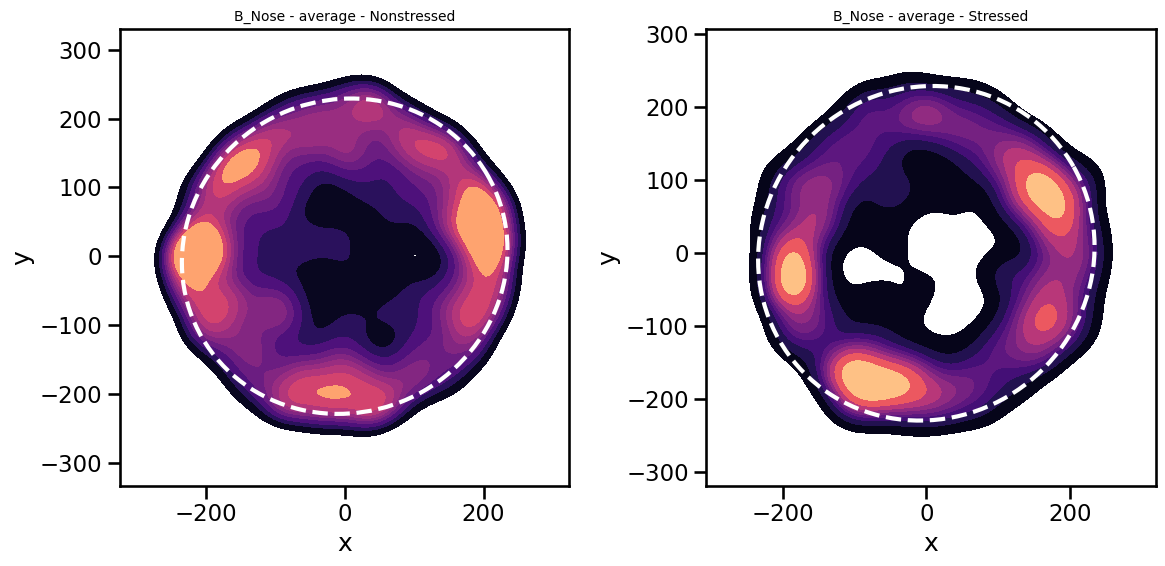

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import deepof.visuals
from matplotlib.patches import Ellipse

sns.set_context("talk")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition="Nonstressed",
    ax=ax1,
    show=False,
    display_arena=True,
    experiment_id="average",
)

deepof.visuals.plot_heatmaps(
    my_deepof_project, 
    ["B_Nose"],
    center="arena", 
    exp_condition="Stressed",
    ax=ax2,
    show=False,
    display_arena=True,
    experiment_id="average",
)

plt.tight_layout()
plt.show()

In [69]:
# Create a preprocessed version of the dataset we're after
pp, _, _ = my_deepof_project.get_graph_dataset(
  #  animal_id="B",
    center="Center",
    align="Spine_1",
    preprocess=True,
    scale="robust",
)

In [70]:
pp[2]

array([], dtype=float64)

In [71]:
from ipywidgets import interact, IntSlider

@interact()
def plot_mouse(i=IntSlider(min=0, max=100)):

    sns.scatterplot(x=pp[0][i][0][:11], y=pp[0][i][0][22:33])
    sns.scatterplot(x=pp[0][i][0][11:22], y=pp[0][i][0][33:44])
#     sns.scatterplot(x=pp[0][15000 + i][0][:11], y=pp[0][15000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][30000 + i][0][:11], y=pp[0][30000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][45000 + i][0][:11], y=pp[0][45000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][60000 + i][0][:11], y=pp[0][60000 + i][0][11:22])
#     sns.scatterplot(x=pp[0][75000 + i][0][:11], y=pp[0][75000 + i][0][11:22])
    
    plt.xlim(-3, 3)
    plt.ylim(-4, 5)
    
    plt.show()

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

In [72]:
ss = (pp[0][:25000], pp[1][:25000], pp[2][:25000], pp[3][:25000], pp[4][:25000], pp[5][:25000])

In [ ]:
%%time
cons = my_deepof_project.deep_unsupervised_embedding(
    ss,
    embedding_model="VaDE",
    epochs=5,
    encoder_type="recurrent",
    n_components=15,
    latent_dim=2,
    kl_warmup=10,
    kl_annealing_mode="linear",
    batch_size=128,
    kmeans_loss=0.0,
    reg_cat_clusters=0.0,
)

In [ ]:
tt = cons.encoder([ss[0], ss[1]])
qq = cons.grouper([ss[0], ss[1]])

In [ ]:
import umap
umap = tt.numpy()#umap.UMAP(n_components=2, n_neighbors=250).fit_transform(tt.numpy())

In [ ]:
means = cons.get_gmm_params['means'].numpy()

sns.scatterplot(x=umap[:, 0], y=umap[:, 1], hue=qq.numpy().argmax(axis=1), palette="tab20")
means = cons.get_layer("grouper").get_layer("gaussian_mixture_latent").c_mu.numpy()
sns.scatterplot(x=means[:,0], y=means[:,1], s=250, c="black")

plt.title("VQVAE embeddings")

plt.legend("")
plt.show()

NameError: name 'plt' is not defined

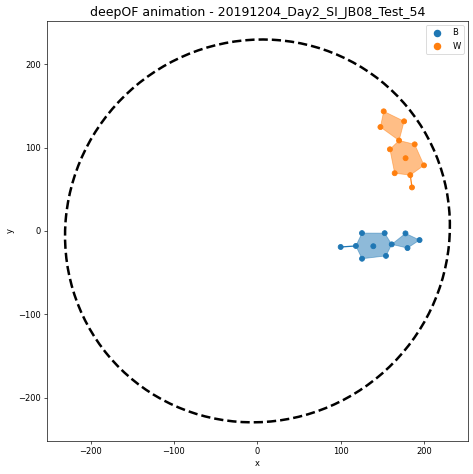

In [73]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    #embedding=emb,
    #cluster_assignments=clust_ass,
    #animal_id="W",
    experiment_id="20191204_Day2_SI_JB08_Test_54",
    frame_limit=250,
    # selected_cluster=0,
    dpi=60,
    # center="Center",
    # align="Spine_1",
    #embedding=[emb_B, emb_W],
    save="SAB_multi_animal_example.mp4",
)

html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
# Single animal display

In [ ]:
from sklearn.decomposition import PCA

emb = PCA(n_components=3).fit_transform(my_deepof_project.get_coords().filter_id("B")['20191204_Day2_SI_JB08_Test_56'])

In [ ]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    animal_id="B",
    embedding=emb,
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=750,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
emb = PCA(n_components=3).fit_transform(my_deepof_project.get_coords(center="Center", align="Spine_1").filter_id("B")['20191204_Day2_SI_JB08_Test_56'])

In [ ]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    center="Center",
    align="Spine_1",
    animal_id="B",
    embedding=emb,
    experiment_id="20191204_Day2_SI_JB08_Test_56",
    frame_limit=750,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
# Get and plot coordinates, distances, angles, and areas. Try and visualizing different centering and rotations

In [ ]:
my_deepof_project.get_coords(polar=True)['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_distances()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_angles()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
my_deepof_project.get_areas()

In [ ]:
my_deepof_project.get_areas()['20191204_Day2_SI_JB08_Test_54']

In [ ]:
# Show how to merge different feature objects

my_deepof_project.get_coords().pca()

### Data preprocessing: generate datasets for machine learning.

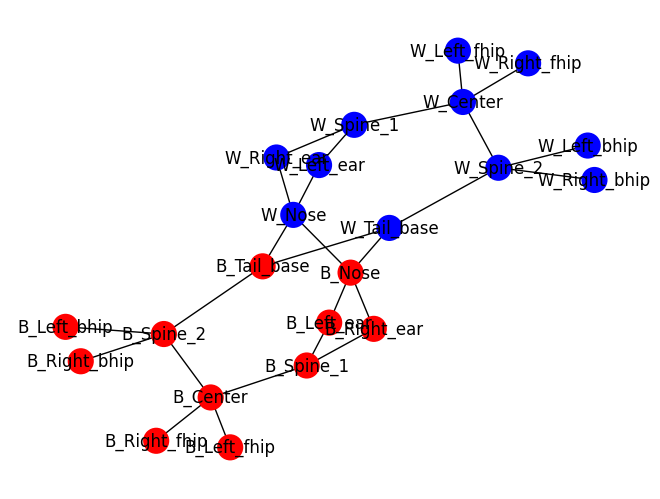

In [12]:
import networkx as nx
from deepof.utils import connect_mouse_topview

G = connect_mouse_topview(animal_ids=["B", "W"], exclude_bodyparts=["Tail_1", "Tail_2", "Tail_tip"])

# Include a (nicer) version of this plot in the tutorial
nx.draw(G, 
        with_labels=True,
        pos=nx.spring_layout(G), 
        node_color=["red" if i.startswith("B") else "blue" for i in G.nodes()])